In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import copy

In [4]:
dataset=pd.read_csv('virus_prediction.csv')

In [5]:
d1=copy.copy(dataset)

In [6]:
del dataset['SlNo'],dataset['FarmerEduaction'],dataset['FarmerAge'],dataset['GPSCordinate'],dataset['Zone']

In [7]:
q=dataset

In [8]:
del q['Temperature'],q['pH'],q['Salinity']

In [9]:
len(q.columns)

39

In [10]:
X_features = q.iloc[:,0:37]
y_label = q.iloc[:, 38]

In [11]:
len(dataset.columns)

39

In [12]:
q.corr()

,InvolveWithShrimpFarming,PriorLandUse,Area_ha,SoilType,CanalDepth_ft,GherDepth_ft,Operator,FertilizerUse,ChemicalUsePondPreparation,ChemicalUseWaterTreatment,...,FeedAdditives,BirdScare,CrabFench,FootBath,LimitedAccess,SameEquipmentForWholeCultureArea,CulturePractice,PreviousPrevalence(%),CurrentPrevalance(%),VirusDetected
InvolveWithShrimpFarming,1.000000,0.127640,-0.084770,0.169379,-0.079040,-0.289423,0.099369,-0.110557,-0.288969,-0.254720,...,-0.183840,-0.193723,-0.397906,-0.397906,-0.355744,0.196515,0.397906,0.271630,0.123457,0.110180
PriorLandUse,0.127640,1.000000,-0.168163,0.038404,0.148609,-0.236366,0.226935,-0.191859,-0.146596,-0.153612,...,-0.096554,0.087531,-0.251987,-0.251987,-0.210232,0.250506,0.251987,-0.047538,-0.012311,0.025344
Area_ha,-0.084770,-0.168163,1.000000,-0.094924,-0.107574,0.189374,-0.392192,0.036613,0.090675,0.053823,...,0.087468,-0.056845,0.148375,0.148375,0.187763,-0.036622,-0.148375,-0.133896,-0.073983,-0.105032
SoilType,0.169379,0.038404,-0.094924,1.000000,-0.035912,-0.154076,0.138673,0.016772,-0.083298,-0.021982,...,-0.049222,0.029007,-0.059389,-0.059389,-0.042837,0.056605,0.059389,-0.047000,-0.099222,-0.139333
CanalDepth_ft,-0.079040,0.148609,-0.107574,-0.035912,1.000000,0.128109,0.143228,0.016793,0.035785,-0.054399,...,0.011205,0.182673,-0.069659,-0.069659,-0.100602,-0.012886,0.069659,-0.100523,-0.016527,0.049896
GherDepth_ft,-0.289423,-0.236366,0.189374,-0.154076,0.128109,1.000000,-0.256968,0.001333,0.487965,0.432557,...,0.415934,0.457984,0.641437,0.641437,0.585247,-0.408110,-0.641437,-0.148730,-0.151991,-0.198201
Operator,0.099369,0.226935,-0.392192,0.138673,0.143228,-0.256968,1.000000,-0.017765,-0.132703,-0.057946,...,-0.148633,0.090524,-0.238653,-0.238653,-0.235478,0.064751,0.238653,-0.082227,0.087279,0.103842
FertilizerUse,-0.110557,-0.191859,0.036613,0.016772,0.016793,0.001333,-0.017765,1.000000,0.017686,-0.036235,...,-0.205822,0.024435,0.142031,0.142031,0.103797,-0.106012,-0.142031,-0.177833,-0.075563,-0.064528
ChemicalUsePondPreparation,-0.288969,-0.146596,0.090675,-0.083298,0.035785,0.487965,-0.132703,0.017686,1.000000,0.355791,...,0.365569,0.365067,0.550697,0.550697,0.485065,-0.253815,-0.550697,-0.212881,-0.060676,-0.035505
ChemicalUseWaterTreatment,-0.254720,-0.153612,0.053823,-0.021982,-0.054399,0.432557,-0.057946,-0.036235,0.355791,1.000000,...,0.596658,0.287362,0.427094,0.427094,0.354307,-0.241925,-0.427094,-0.148640,-0.117333,-0.105024


In [13]:
c = q.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

In [14]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [15]:
so[::-1]

VirusDetected                     VirusDetected                       1.000000
CrabFench                         CrabFench                           1.000000
SourceOfFingerling                SourceOfFingerling                  1.000000
StockingDensity_PL/40MeterSquare  StockingDensity_PL/40MeterSquare    1.000000
StockingAge_Days                  StockingAge_Days                    1.000000
PLQuality                         PLQuality                           1.000000
CropRotation                      CropRotation                        1.000000
FeedType                          FeedType                            1.000000
FeedAdditives                     FeedAdditives                       1.000000
BirdScare                         BirdScare                           1.000000
CrabFench                         FootBath                            1.000000
PreviousPrevalence(%)             PreviousPrevalence(%)               1.000000
CrabFench                         CulturePractice   

In [16]:
del q['CrabFench'],q['FootBath'],q['Aerator'],q['Reservoir'],q['LimitedAccess'],q['WaterSource_IndirectNatural']

In [17]:
len(q.columns)

33

In [18]:
r=q.corr()

In [19]:
r['VirusDetected']

InvolveWithShrimpFarming            0.110180
PriorLandUse                        0.025344
Area_ha                            -0.105032
SoilType                           -0.139333
CanalDepth_ft                       0.049896
GherDepth_ft                       -0.198201
Operator                            0.103842
FertilizerUse                      -0.064528
ChemicalUsePondPreparation         -0.035505
ChemicalUseWaterTreatment          -0.105024
GherDryAfterHarvest                -0.034867
SludgeRemovalMethods                0.144276
SludgeRemovalInterval              -0.083042
MaintainAndRepairDikes              0.052706
PeriodOfFallow                     -0.080085
WaterSource_DirectNatural          -0.069897
WaterComingViaOtherFarms            0.109025
WaterExchangeFrequency              0.162144
InletOutlet                         0.212860
CultureMethod                      -0.213695
SourceOfFingerling                 -0.077315
StockingDensity_PL/40MeterSquare    0.000663
StockingAg

In [20]:
non_target=q.iloc[:,0:31]
target=q.iloc[:,32]

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(non_target)
model.fit(df,target)

RandomForestRegressor(max_depth=10, random_state=1)

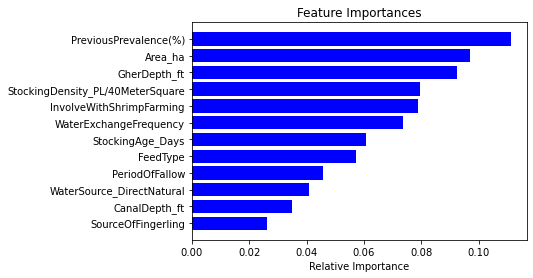

In [22]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-12:]  # top 12 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
k=[features[i] for i in indices]

In [24]:
k

['SourceOfFingerling',
 'CanalDepth_ft',
 'WaterSource_DirectNatural',
 'PeriodOfFallow',
 'FeedType',
 'StockingAge_Days',
 'WaterExchangeFrequency',
 'InvolveWithShrimpFarming',
 'StockingDensity_PL/40MeterSquare',
 'GherDepth_ft',
 'Area_ha',
 'PreviousPrevalence(%)']

In [25]:
a=[]
for i in k:
    a.append(q[i])

In [26]:
subset=q[['SourceOfFingerling',
 'CanalDepth_ft',
 'WaterSource_DirectNatural',
 'PeriodOfFallow',
 'FeedType',
 'StockingAge_Days',
 'WaterExchangeFrequency',
 'InvolveWithShrimpFarming',
 'StockingDensity_PL/40MeterSquare',
 'GherDepth_ft',
 'Area_ha',
 'PreviousPrevalence(%)',
         'VirusDetected']]

In [27]:
subset.corr()

,SourceOfFingerling,CanalDepth_ft,WaterSource_DirectNatural,PeriodOfFallow,FeedType,StockingAge_Days,WaterExchangeFrequency,InvolveWithShrimpFarming,StockingDensity_PL/40MeterSquare,GherDepth_ft,Area_ha,PreviousPrevalence(%),VirusDetected
SourceOfFingerling,1.000000,0.035606,-0.137166,0.059894,0.023306,-0.112554,-0.080109,-0.060112,0.107512,-0.026282,0.027148,0.083468,-0.077315
CanalDepth_ft,0.035606,1.000000,0.192276,0.027859,0.075368,0.010511,0.081943,-0.079040,-0.042243,0.128109,-0.107574,-0.100523,0.049896
WaterSource_DirectNatural,-0.137166,0.192276,1.000000,0.000204,0.085197,0.015094,-0.038716,0.072533,-0.055061,-0.092908,-0.142451,-0.089650,-0.069897
PeriodOfFallow,0.059894,0.027859,0.000204,1.000000,0.033675,0.082175,-0.195773,-0.229475,0.154276,0.155754,0.076959,-0.113613,-0.080085
FeedType,0.023306,0.075368,0.085197,0.033675,1.000000,0.202724,-0.139479,0.015020,-0.126814,-0.197560,-0.081768,-0.067498,0.047696
StockingAge_Days,-0.112554,0.010511,0.015094,0.082175,0.202724,1.000000,0.043152,0.065371,0.061938,-0.076719,0.036998,-0.104355,0.000348
WaterExchangeFrequency,-0.080109,0.081943,-0.038716,-0.195773,-0.139479,0.043152,1.000000,0.249917,-0.025651,-0.013840,-0.026583,0.204796,0.162144
InvolveWithShrimpFarming,-0.060112,-0.079040,0.072533,-0.229475,0.015020,0.065371,0.249917,1.000000,-0.170095,-0.289423,-0.084770,0.271630,0.110180
StockingDensity_PL/40MeterSquare,0.107512,-0.042243,-0.055061,0.154276,-0.126814,0.061938,-0.025651,-0.170095,1.000000,0.319577,0.173900,-0.013327,0.000663
GherDepth_ft,-0.026282,0.128109,-0.092908,0.155754,-0.197560,-0.076719,-0.013840,-0.289423,0.319577,1.000000,0.189374,-0.148730,-0.198201


In [28]:
import random
split_ratio=0.70

def split_train_test(data, split_ratio, train, test):
    for index,row in data.iterrows():
        if(random.random()>split_ratio):
            test.append(row)
        else:
            train.append(row)
        
train=[]
test=[]

split_train_test(subset, split_ratio, train, test)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
xtrain=[]
ytrain=[]
for x in train:
    xtrain.append(x[:12])
    ytrain.append(x[12])

In [31]:
xtest=[]
ytest=[]
for x in test:
    xtest.append(x[:12])
    ytest.append(x[12])

In [32]:
from sklearn import metrics
DT = DecisionTreeClassifier(max_depth=4)
DT = DT.fit(xtrain,ytrain)
pred_test = DT.predict(xtest)
pred_train = DT.predict(xtrain)
print("Accuracy for Decision tree, Random Forest, KNN and Logistic Regression models\n")
print("Decision tree")
print("Train Accuracy:",metrics.accuracy_score(ytrain, pred_train))
print("Test Accuracy:",metrics.accuracy_score(ytest, pred_test))
print("")

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_depth=4)
RFC = RFC.fit(xtrain,ytrain)
pred_test = RFC.predict(xtest)
pred_train = RFC.predict(xtrain)
print("Random forest classifier")
print("Train Accuracy:",metrics.accuracy_score(ytrain, pred_train))
print("Test Accuracy:",metrics.accuracy_score(ytest, pred_test))
print("")

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN = KNN.fit(xtrain,ytrain)
pred_test = KNN.predict(xtest)
pred_train = KNN.predict(xtrain)
print("K nearest neighbour")
print("Train Accuracy:",metrics.accuracy_score(ytrain, pred_train))
print("Test Accuracy:",metrics.accuracy_score(ytest, pred_test))
print("")

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR = LR.fit(xtrain,ytrain)
pred_test = LR.predict(xtest)
pred_train = LR.predict(xtrain)
print("Logistic Regression")
print("Train Accuracy:",metrics.accuracy_score(ytrain, pred_train))
print("Test Accuracy:",metrics.accuracy_score(ytest, pred_test))
print("")



Accuracy for Decision tree, Random Forest, KNN and Logistic Regression models

Decision tree
Train Accuracy: 0.7639751552795031
Test Accuracy: 0.6805555555555556

Random forest classifier
Train Accuracy: 0.8260869565217391
Test Accuracy: 0.6944444444444444

K nearest neighbour
Train Accuracy: 0.7391304347826086
Test Accuracy: 0.6111111111111112

Logistic Regression
Train Accuracy: 0.7204968944099379
Test Accuracy: 0.625



In [33]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=4)

In [34]:
a=subset.iloc[:,0:12]
b=subset.iloc[:,12]

DTSKF = DecisionTreeClassifier(max_depth=4)
RFCSKF = RandomForestClassifier(max_depth=4)
KNNSKF = KNeighborsClassifier(n_neighbors=3)
LRSKF = LogisticRegression(solver='liblinear')

dt_train_accuracy=[]
dt_test_accuracy=[]

rf_train_accuracy=[]
rf_test_accuracy=[]

knn_train_accuracy=[]
knn_test_accuracy=[]

lr_train_accuracy=[]
lr_test_accuracy=[]

for train_index, test_index in skf.split(a,b):
    #print(train_index,test_index)
    x_train=[]
    x_test=[]
    y_train=[]
    y_test=[]
    for i in train_index:
        x_train.append(a.iloc[i])
        y_train.append(b.iloc[i])
        
    for i in test_index:
        x_test.append(a.iloc[i])
        y_test.append(b.iloc[i])
        

    DTSKF = DTSKF.fit(x_train,y_train)
    pred_train = DTSKF.predict(x_train)
    pred_test = DTSKF.predict(x_test)
    #print("Train Accuracy:",metrics.accuracy_score(ytrain, pred_train))
    #print("Test Accuracy:",metrics.accuracy_score(ytest, pred_test))
    dt_train_accuracy.append(metrics.accuracy_score(y_train, pred_train))
    dt_test_accuracy.append(metrics.accuracy_score(y_test, pred_test))
    
    RFCSKF = RFCSKF.fit(x_train,y_train)
    pred_train = RFCSKF.predict(x_train)
    pred_test = RFCSKF.predict(x_test)
    #print("Train Accuracy:",metrics.accuracy_score(ytrain, pred_train))
    #print("Test Accuracy:",metrics.accuracy_score(ytest, pred_test))
    rf_train_accuracy.append(metrics.accuracy_score(y_train, pred_train))
    rf_test_accuracy.append(metrics.accuracy_score(y_test, pred_test))
    
    KNNSKF = KNNSKF.fit(x_train,y_train)
    pred_train = KNNSKF.predict(x_train)
    pred_test = KNNSKF.predict(x_test)
    #print("Train Accuracy:",metrics.accuracy_score(ytrain, pred_train))
    #print("Test Accuracy:",metrics.accuracy_score(ytest, pred_test))
    knn_train_accuracy.append(metrics.accuracy_score(y_train, pred_train))
    knn_test_accuracy.append(metrics.accuracy_score(y_test, pred_test))
    
    LRSKF = LRSKF.fit(x_train,y_train)
    pred_train = LRSKF.predict(x_train)
    pred_test = LRSKF.predict(x_test)
    #print("Train Accuracy:",metrics.accuracy_score(ytrain, pred_train))
    #print("Test Accuracy:",metrics.accuracy_score(ytest, pred_test))
    lr_train_accuracy.append(metrics.accuracy_score(y_train, pred_train))
    lr_test_accuracy.append(metrics.accuracy_score(y_test, pred_test))
    

print("Accuracy for Decision tree, Random Forest Classifier, KNN and Logistic Regression models using stratified K fold cross validation\n")
print("Decision tree")
print("training accuracy : "+str(sum(dt_train_accuracy)/4))
print("testing accuracy  : "+str(sum(dt_test_accuracy)/4))
print("")
print("Random forest classifier")
print("training accuracy : "+str(sum(rf_train_accuracy)/4))
print("testing accuracy  : "+str(sum(rf_test_accuracy)/4))
print("")
print("K nearest neighbour")
print("training accuracy : "+str(sum(knn_train_accuracy)/4))
print("testing accuracy  : "+str(sum(knn_test_accuracy)/4))
print("")
print("Logistic Regression")
print("training accuracy : "+str(sum(lr_train_accuracy)/4))
print("testing accuracy  : "+str(sum(lr_test_accuracy)/4))

Accuracy for Decision tree, Random Forest Classifier, KNN and Logistic Regression models using stratified K fold cross validation

Decision tree
training accuracy : 0.8125862068965517
testing accuracy  : 0.6047632963179428

Random forest classifier
training accuracy : 0.8383169129720853
testing accuracy  : 0.6910432495616599

K nearest neighbour
training accuracy : 0.762512315270936
testing accuracy  : 0.5664815897136177

Logistic Regression
training accuracy : 0.705303776683087
testing accuracy  : 0.6182057276446522


In [35]:
# Graph section

In [36]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [37]:
# Without stratified k fold

# Decision tree
dt_train_accuracy=[81.0, 77.7, 84.5, 77.3, 84.1]
dt_test_accuracy=[57.6, 60.5, 62.0, 70.0, 57.3]

# Random forest classifier
rf_train_accuracy=[85.1, 87.8, 86.8, 85.8, 86.7]
rf_test_accuracy=[71.7, 75.0, 67.2, 68.5, 70.6]

# KNN
knn_train_accuracy=[74.3, 77.0, 76.5, 77.3, 75.9]
knn_test_accuracy=[63.5, 69.7, 50.0, 67.1, 52.0]

# Logistic Regression
lr_train_accuracy=[70.9, 69.4, 73.7, 73.0, 66.4]
lr_test_accuracy=[56.4, 67.1, 55.4, 61.4, 66.6]

instances=[1,2,3,4,5]

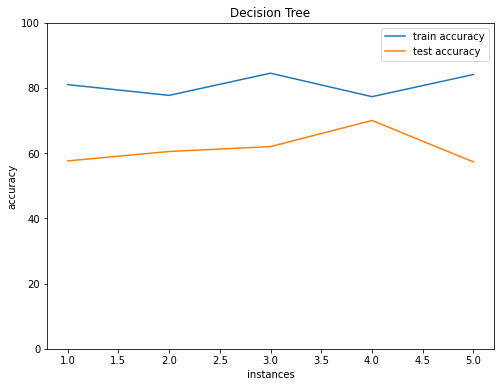

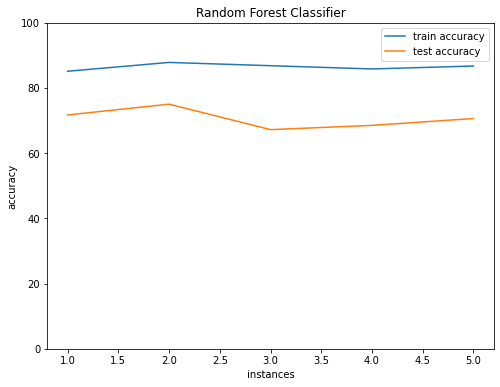

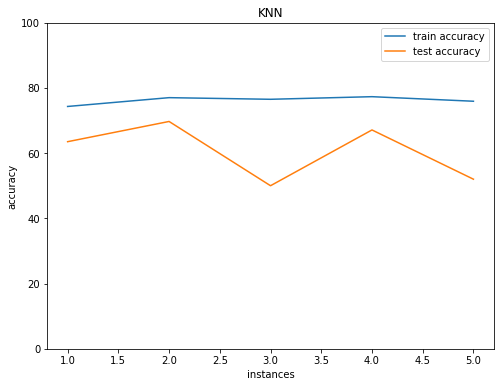

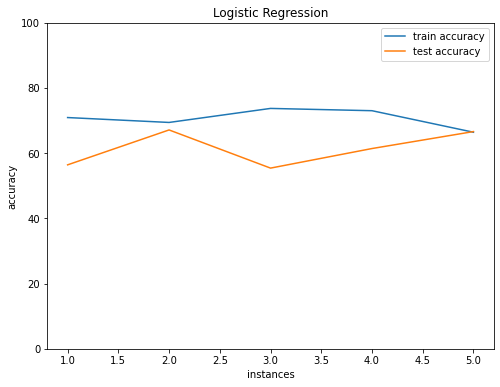

In [38]:
plt.figure(figsize=(8,6))
plt.title("Decision Tree")
plt.plot(instances,dt_train_accuracy)
plt.plot(instances,dt_test_accuracy)
plt.ylim(0,100)
plt.xlabel("instances")
plt.ylabel("accuracy")
plt.legend(['train accuracy', 'test accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title("Random Forest Classifier")
plt.plot(instances,rf_train_accuracy)
plt.plot(instances,rf_test_accuracy)
plt.ylim(0,100)
plt.xlabel("instances")
plt.ylabel("accuracy")
plt.legend(['train accuracy', 'test accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title("KNN")
plt.plot(instances,knn_train_accuracy)
plt.plot(instances,knn_test_accuracy)
plt.ylim(0,100)
plt.xlabel("instances")
plt.ylabel("accuracy")
plt.legend(['train accuracy', 'test accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title("Logistic Regression")
plt.plot(instances,lr_train_accuracy)
plt.plot(instances,lr_test_accuracy)
plt.ylim(0,100)
plt.xlabel("instances")
plt.ylabel("accuracy")
plt.legend(['train accuracy', 'test accuracy'])
plt.show()


In [39]:
# With Stratified K fold

# Decision tree
dt_skf_train_accuracy=[81.2, 81.2, 81.2, 81.2, 81.2]
dt_skf_test_accuracy=[60.0, 61.3, 60.4, 60.4, 60.4]

# Random forest classifier
rf_skf_train_accuracy=[84.8, 84.4, 83.9, 85.6, 84.8]
rf_skf_test_accuracy=[68.6, 69.5, 69.5, 68.7, 69.0]

# KNN
knn_skf_train_accuracy=[76.2, 76.2, 76.2, 76.2, 76.2]
knn_skf_test_accuracy=[56.6, 56.6, 56.7, 56.6, 56.6]

# Logistic Regression
lr_skf_train_accuracy=[70.5, 70.5, 70.5, 70.5, 70.5]
lr_skf_test_accuracy=[61.8, 61.8, 61.8, 61.8, 61.8]

instances=[1,2,3,4,5]

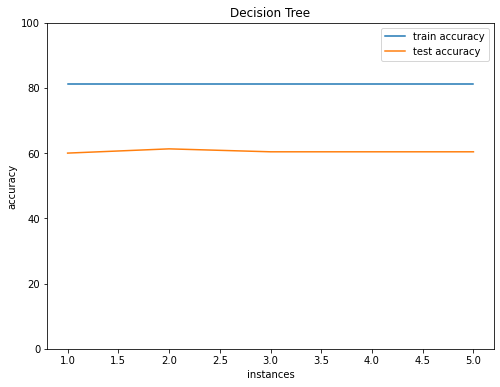

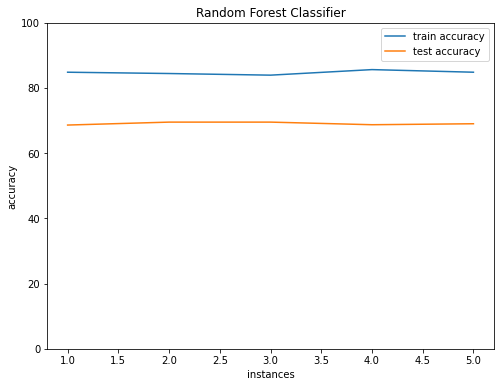

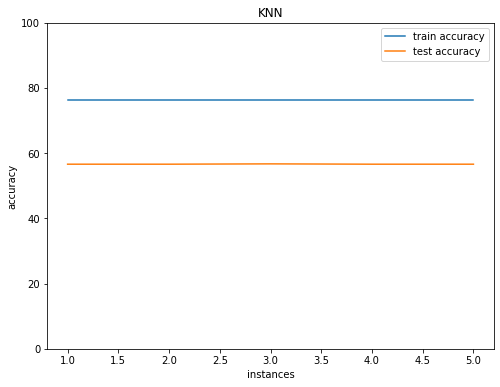

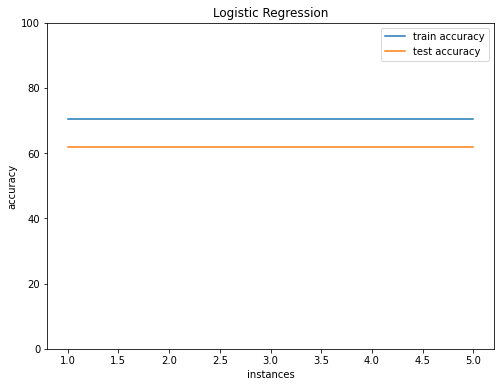

In [40]:
plt.figure(figsize=(8,6))
plt.title("Decision Tree")
plt.plot(instances,dt_skf_train_accuracy)
plt.plot(instances,dt_skf_test_accuracy)
plt.ylim(0,100)
plt.xlabel("instances")
plt.ylabel("accuracy")
plt.legend(['train accuracy', 'test accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title("Random Forest Classifier")
plt.plot(instances,rf_skf_train_accuracy)
plt.plot(instances,rf_skf_test_accuracy)
plt.ylim(0,100)
plt.xlabel("instances")
plt.ylabel("accuracy")
plt.legend(['train accuracy', 'test accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title("KNN")
plt.plot(instances,knn_skf_train_accuracy)
plt.plot(instances,knn_skf_test_accuracy)
plt.ylim(0,100)
plt.xlabel("instances")
plt.ylabel("accuracy")
plt.legend(['train accuracy', 'test accuracy'])
plt.show()

plt.figure(figsize=(8,6))
plt.title("Logistic Regression")
plt.plot(instances,lr_skf_train_accuracy)
plt.plot(instances,lr_skf_test_accuracy)
plt.ylim(0,100)
plt.xlabel("instances")
plt.ylabel("accuracy")
plt.legend(['train accuracy', 'test accuracy'])
plt.show()

In [41]:
# Conclusion
# 1. Random forest classifier is the best model in terms of both test and train accuracy.
# 2. K nearest neighbour performs worst among all the 4 models for disease prediction.
# 3. Adding stratified K fold validation reduces the variance of train/test accuracies for all 4 models.
# 4. The gap between train accuracy and testing accuracy is least for logistic regression indicating that LR model 
#    works well with unseen data.


In [42]:
def convert(n):
    if(n==0.0 or n==0):
        return "No Disease"
    else:
        return "Disease"


instance_list=[]
import random
for x,y in subset.iteritems():
    if(x!='VirusDetected'):
        if(y.dtypes=="int"):
            instance_list.append(random.randint(min(y),max(y)))
        else:
            instance_list.append(random.uniform(min(y),max(y)))
            
single_instance=np.array(instance_list).reshape(1,-1)

print("Prediction for simple models -")
print("Decision tree: "+convert(DT.predict(single_instance)))
print("Random forest classifier: "+convert(RFC.predict(single_instance)))
print("KNN: "+convert(KNN.predict(single_instance)))
print("Logistic Regression: "+convert(LR.predict(single_instance)))

print("\nPrediction for models after adding stratified k fold cross validation -")
print("Decision tree: "+convert(DTSKF.predict(single_instance)))
print("Random forest classifier: "+convert(RFCSKF.predict(single_instance)))
print("KNN: "+convert(KNNSKF.predict(single_instance)))
print("Logistic Regression: "+convert(LRSKF.predict(single_instance)))

Prediction for simple models -
Decision tree: No Disease
Random forest classifier: No Disease
KNN: No Disease
Logistic Regression: Disease

Prediction for models after adding stratified k fold cross validation -
Decision tree: No Disease
Random forest classifier: Disease
KNN: Disease
Logistic Regression: Disease
